In [1]:
from defillama2 import DefiLlama
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
def human_format_dollar_or_num(dollar=False, decimals=0):
    """ 
    Return a function for formatting matplot axis numbers human friendly. 

    Parameters
    ----------
    dollar: logical
        If True, will add $ in front of the numbers.
    decimals: int
        Number of decimals to display.
    """

    base_fmt = '%.{}f%s'.format(decimals)
    if dollar:
        base_fmt = '$' + base_fmt

    def human_format(num, pos): # pos is necessary as it'll be used by matplotlib
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return base_fmt % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
    return human_format

## Create a DefiLlama instance

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-10-01,"74,996,358,501.1898"
2022-10-02,"75,209,945,493.9769"
2022-10-03,"74,330,562,940.6809"
2022-10-04,"75,419,072,831.7253"
2022-10-05,"76,005,180,866.3439"


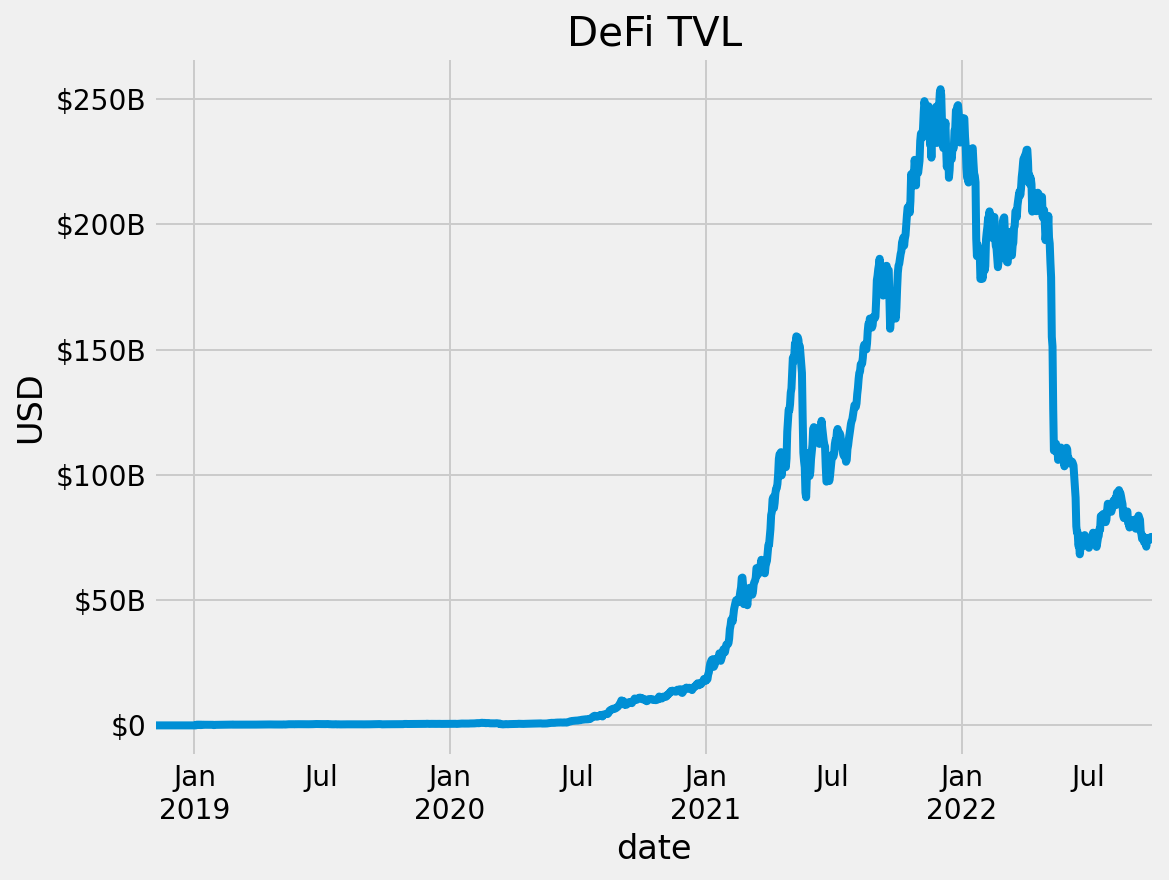

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-10-01,"1,008,458,047.3219"
2022-10-02,"1,003,732,414.5372"
2022-10-03,"993,776,479.1881"
2022-10-04,"1,007,604,768.1666"
2022-10-05,"1,023,182,902.5634"


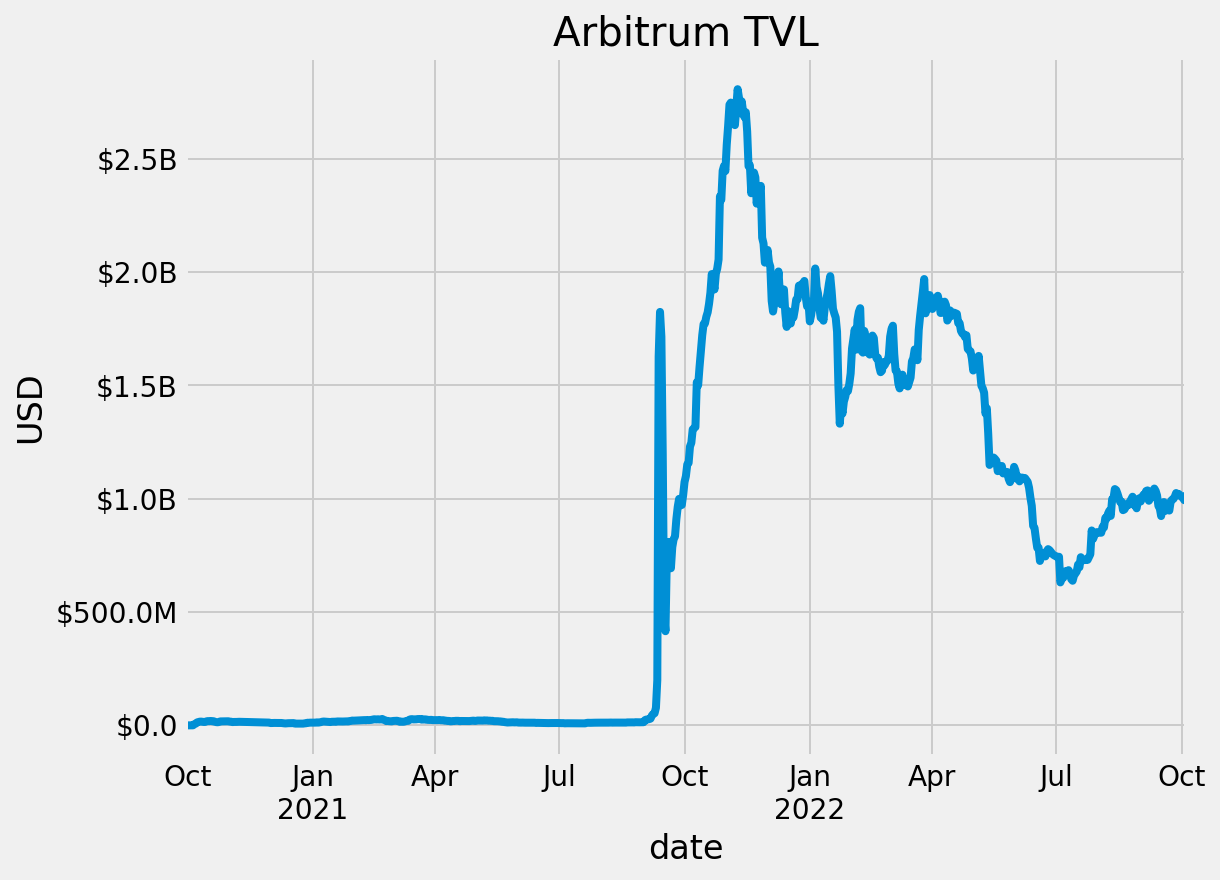

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [8]:
df = obj.get_chains_curr_tvl()

# print top 20 chains by tvl
df = df.sort_values('tvl', ascending=False) 
df.head(20)

,token,tvl
chain,,
Ethereum,ETH,"48,956,847,117.4157"
Binance,BNB,"6,675,706,940.1355"
Tron,TRON,"5,693,983,214.8199"
Solana,SOL,"2,077,518,745.3160"
Avalanche,AVAX,"1,924,309,734.9199"
Polygon,MATIC,"1,499,068,131.2622"
Optimism,OP,"1,052,193,008.6765"
Arbitrum,None,"1,022,428,693.6840"
Cronos,CRO,"774,095,942.5756"


## Get current TVL of a protocol

In [9]:
obj.get_protocol_curr_tvl('gmx')

455521075.7314042

In [10]:
obj.get_protocol_curr_tvl('premia')

7749990.033175918

In [11]:
obj.get_protocol_curr_tvl('gns')

{'message': 'Protocol is not in our database'}

In [12]:
# but it doesn't always work, for example, can't pull AAVE
obj.get_protocol_curr_tvl('aave')

{'message': 'Protocol is not in our database'}

## Get current TVL of a protocol broken down by chain

In [13]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"65,524,875.4873"
Avalanche-staking,"15,691,132.3232"
Arbitrum-staking,"269,396,936.7290"
Arbitrum,"389,996,200.2441"


In [14]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('gmx')) < 0.1

tvl    True
dtype: bool

In [15]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,274,773.2678"
Binance,"9,588.5260"
Ethereum,"1,930,029.0925"
Ethereum-staking,"5,110,176.2421"
Arbitrum,"3,347,232.0044"
Fantom,"1,188,367.1425"


In [16]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('premia')) < 0.1

tvl    True
dtype: bool

In [17]:
# let's get AAVE's current TVL
df = obj.get_protocol_curr_tvl_by_chain('aave')
df[~df.index.str.contains('staking')].sum()

tvl   12,122,761,931.9483
dtype: float64

## Get historical TVL of a protocol by chain

In [18]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

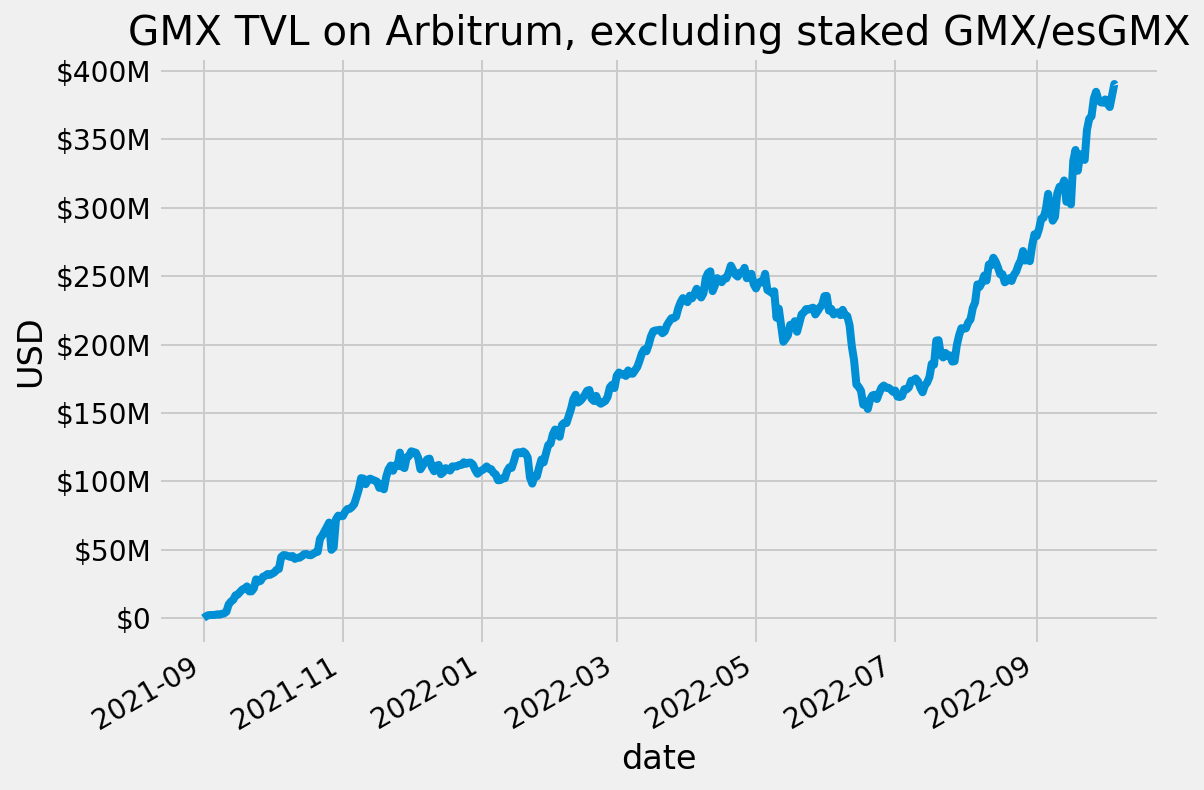

In [19]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

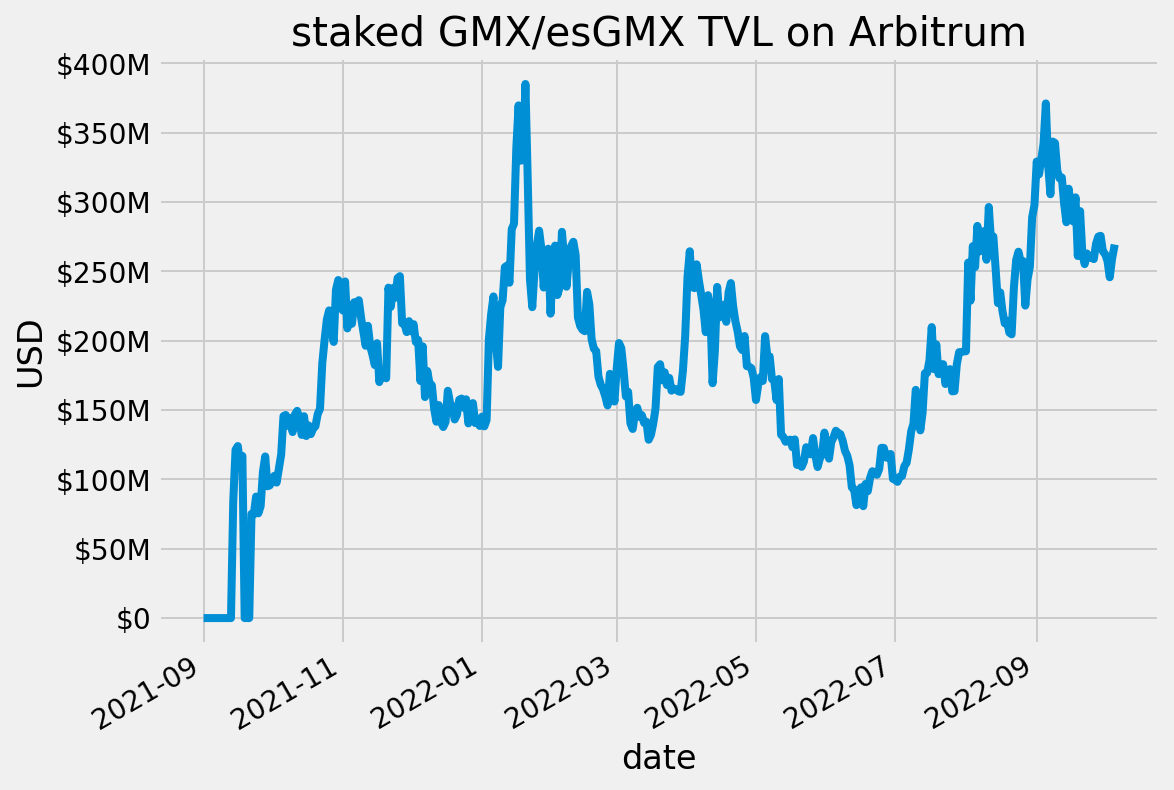

In [20]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

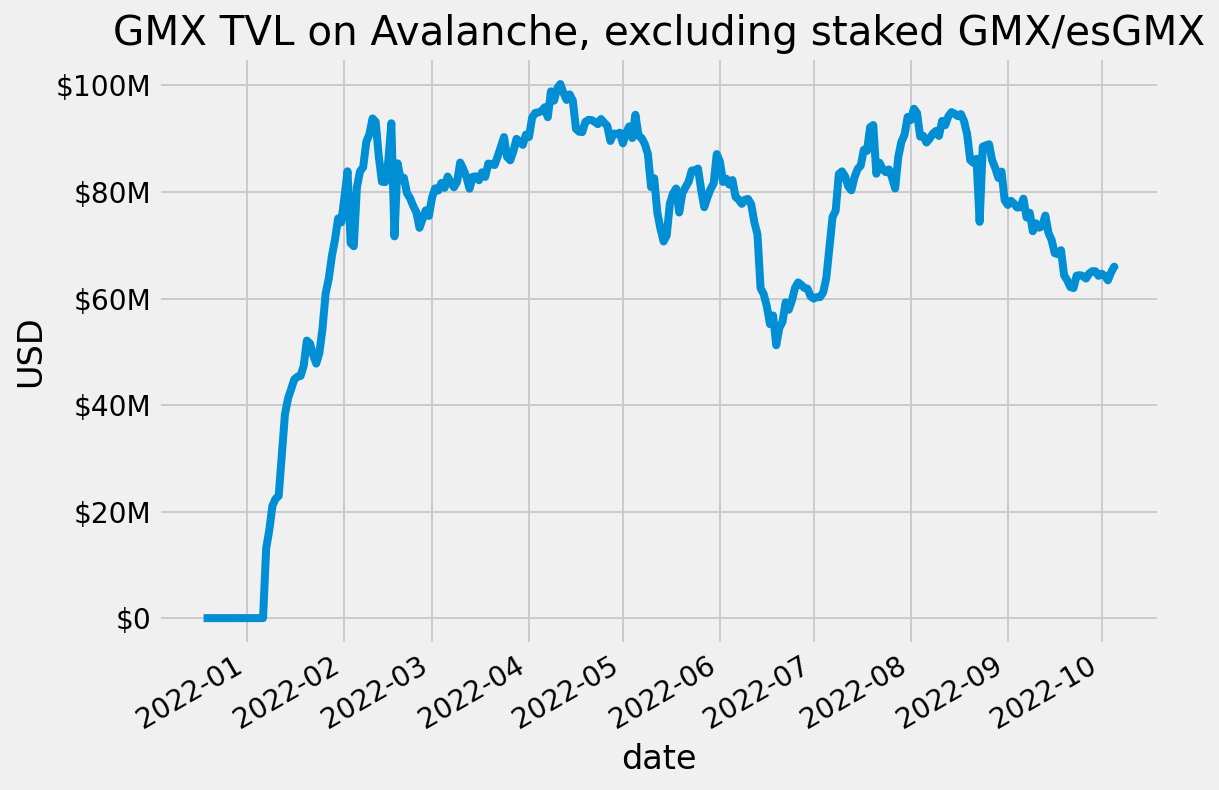

In [21]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

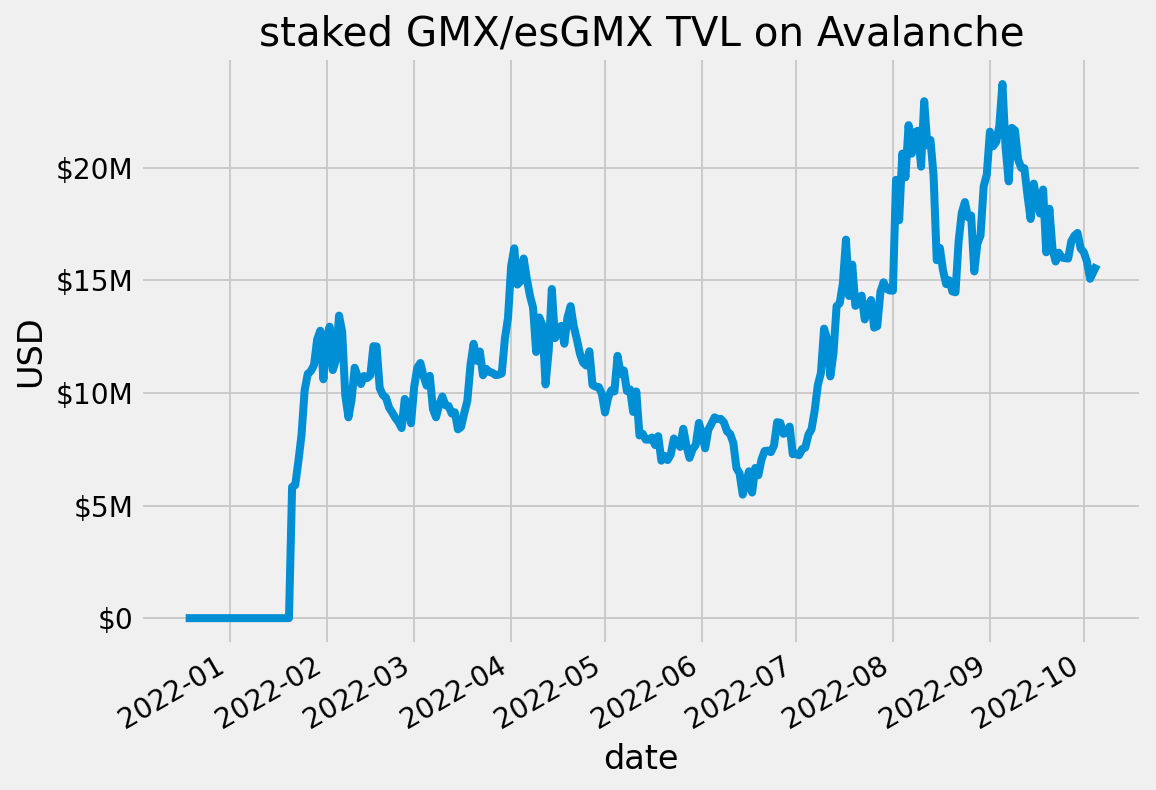

In [22]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [23]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"7,760,834,160.9318",1.4946,7.8184,"851,777,351.0000","763,458,443.0000",NaN
1,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,776,893,685.1262",1.9506,8.9704,"8,389,155,101.0000","6,242,789,036.0000",NaN
2,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","6,185,748,800.2808",2.2492,6.1435,"1,560,923,450.0000","1,034,955,210.0000",NaN
3,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, Polygon, xDai, Arbitrum, Avalanche,...","6,031,368,313.5676",-0.5194,1.9565,"3,003,242,917.0000","356,383,466.0000",NaN
4,Uniswap,UNI,Multi-Chain,Dexes,"[Ethereum, Arbitrum, Polygon, Optimism, Celo]","5,284,587,541.6392",NaN,2.0580,"6,634,544,209.0000","5,000,898,275.0000",NaN
5,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"4,941,635,175.7869",2.9181,7.5876,"4,874,422,742.0000","4,874,422,742.0000",NaN
6,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","4,305,540,156.9470",1.5965,1.1270,"1,217,810,096.0000","1,074,339,812.0000",NaN
7,Convex Finance,CVX,Ethereum,Yield,[Ethereum],"3,997,547,517.7868",-1.1988,0.8063,"491,372,807.0000","340,433,212.0000",NaN
8,JustLend,JST,Tron,Lending,[Tron],"3,428,561,512.1763",-3.6908,8.9885,"252,016,401.0000","226,613,148.0000",NaN
9,PancakeSwap,CAKE,Binance,Dexes,[Binance],"2,989,977,126.3108",1.2479,4.3061,"3,558,893,724.0000","661,186,967.0000",[Uniswap]


In [24]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,CGO Finance,CGO,Cronos,Yield Aggregator,[Cronos],"13,710,926.2722",23.4679,"14,640.0815",NaN,NaN,[]
1,Thetanuts Finance,-,Multi-Chain,Options,"[Ethereum, Polygon, Fantom, Avalanche, Binance...","9,747,359.8512",1.1177,584.5765,NaN,NaN,NaN
2,Unit Protocol,DUCK,Ethereum,CDP,[Ethereum],"1,058,204.6464",2.7349,452.2535,"5,161,635.0000","2,433,408.0000",NaN
3,Jarvis Network,JRT,Multi-Chain,Derivatives,"[Polygon, Binance, xDai, Ethereum]","7,787,194.9560",-4.2557,433.1178,"8,324,958.0000","3,146,933.0000",NaN
4,Powerbomb Finance,-,Multi-Chain,Yield,"[Optimism, Avalanche, Harmony, Arbitrum, Polygon]","153,387.8011",31.6410,298.5913,NaN,NaN,NaN


In [25]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,MakerDAO,CDP,"7,760,834,160.9318","851,777,351.0000","763,458,443.0000",0.0984,0.1098
1,Polygon Bridge & Staking,Chain,"6,776,893,685.1262","8,389,155,101.0000","6,242,789,036.0000",0.9212,1.2379
2,Lido,Liquid Staking,"6,185,748,800.2808","1,560,923,450.0000","1,034,955,210.0000",0.1673,0.2523
3,Curve,Dexes,"6,031,368,313.5676","3,003,242,917.0000","356,383,466.0000",0.0591,0.4979
4,Uniswap,Dexes,"5,284,587,541.6392","6,634,544,209.0000","5,000,898,275.0000",0.9463,1.2555
...,...,...,...,...,...,...,...
1970,Valkyrie,Launchpad,0.0000,"1,598,382.0000","265,380.0000",inf,inf
1971,KawaiiSwap,Yield,0.0000,NaN,NaN,NaN,NaN
1972,Louverture,Yield,0.0000,"30,701.0000",0.0000,NaN,inf
1973,Wisteria Swap,Yield,0.0000,NaN,0.0000,NaN,NaN


In [26]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"1,285,216,455.4471","1,040,985,401,278.0000","686,380,140.3800"
Bridge,"11,230,998,850.4969","5,924,739,790.0000","5,344,659,197.0000"
CDP,"10,381,564,678.0085","3,440,335,178.0000","1,494,170,455.0000"
Chain,"7,237,106,437.5787","9,207,222,644.0000","6,913,144,003.0000"
Cross Chain,"985,715,296.8942","1,184,026,659.0000","453,431,603.0000"
Derivatives,"1,194,290,907.9135","11,948,440,378,355.0000","880,292,841.0000"
Dexes,"24,230,305,200.5670","39,131,496,127.7100","14,445,313,407.1700"
Farm,"46,093,895.2572","15,300,453.8400","3,356,787.0000"
Gaming,"12,241,263.7229","3,772,387,820.0000","1,455,595,681.7000"
